# **Laboratorijska vježba 7**: Zadaci za samostalni rad

## **Predviđanje udomljavanja životinja**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o životinjama iz skloništa za životinje. Cilj je izgraditi i trenirati algoritam strojnog učenja koji će predvidjeti hoće li životinja iz skloništa biti udomljena ili ne. Skup podataka sadrži sljedeće značajke:

* animal_type - tip životinje
* intake_year - godina primanja u sklonište
* intake_condition - stanje životinje pri primanju u sklonište
* intake_number - broj slučajeva kada je ista životinja dovedena u sklonište
* intake_type - tip donošenja u sklonište (primjerice, zalutala životinja, dobrovoljna predaja vlasnika,...)
* sex_upon_intake - spol životinje i informacija o kastriranju pri primanju
* age_upon_intake - dob životinje pri primanju
* time_in_shelter_days - broj dana koja je životinja provela u skloništu
* sex_upon_outcome - spol životinje i informacija o kastriranju pri donošenju odluke o udomljavanju
* age_upon_outcome - dob životinje pri donošenju odluke o udomljavanju
* outcome_type - odluka o udomljavanju

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


data_folder = './Data/'

In [4]:
data = pd.read_csv('Data/aac_intakes_outcomes.csv')
data.head(5)

age_upon_outcome animal_id_outcome        date_of_birth outcome_subtype  \
0         10 years           A006100  2007-07-09 00:00:00             NaN   
1          7 years           A006100  2007-07-09 00:00:00             NaN   
2          6 years           A006100  2007-07-09 00:00:00             NaN   
3         10 years           A047759  2004-04-02 00:00:00         Partner   
4         16 years           A134067  1997-10-16 00:00:00             NaN   

      outcome_type sex_upon_outcome  age_upon_outcome_(days)  \
0  Return to Owner    Neutered Male                     3650   
1  Return to Owner    Neutered Male                     2555   
2  Return to Owner    Neutered Male                     2190   
3         Transfer    Neutered Male                     3650   
4  Return to Owner    Neutered Male                     5840   

   age_upon_outcome_(years) age_upon_outcome_age_group     outcome_datetime  \
0                      10.0                (7.5, 10.0]  2017-12-07 14:07:00   
1                       7.0                 (5.0, 7.5]  2014-12-20 16:35:00   
2                       6.0                 (5.0, 7.5]  2014-03-08 17:10:00   
3                      10.0                (7.5, 10.0]  2014-04-07 15:12:00   
4                      16.0               (15.0, 17.5]  2013-11-16 11:54:00   

   ...  age_upon_intake_age_group      intake_datetime intake_month  \
0  ...                (7.5, 10.0]  2017-12-07 00:00:00           12   
1  ...                 (5.0, 7.5]  2014-12-19 10:21:00           12   
2  ...                 (5.0, 7.5]  2014-03-07 14:26:00            3   
3  ...                (7.5, 10.0]  2014-04-02 15:55:00            4   
4  ...               (15.0, 17.5]  2013-11-16 09:02:00           11   

  intake_year  intake_monthyear  intake_weekday  intake_hour  intake_number  \
0        2017           2017-12        Thursday           14            1.0   
1        2014           2014-12          Friday           10            2.0   
2        2014           2014-03          Friday           14            3.0   
3        2014           2014-04       Wednesday           15            1.0   
4        2013           2013-11        Saturday            9            1.0   

             time_in_shelter time_in_shelter_days  
0  0 days 14:07:00.000000000             0.588194  
1  1 days 06:14:00.000000000             1.259722  
2  1 days 02:44:00.000000000             1.113889  
3  4 days 23:17:00.000000000             4.970139  
4  0 days 02:52:00.000000000             0.119444  

[5 rows x 41 columns]

## **Zadatak 1: Transformacija značajki**

Uredite skup podataka na način da rukujete s nedostajućim vrijednostima. Provjerite ima li takvih vrijednosti te ih uklonite ili nadomjestite prikladnim vrijednostima.



In [5]:
#Uklonjen "outcome_subtype" stupac jer je imao vise od pola izostalih vrijednosti
#data.drop(columns=["outcome_subtype"],inplace=True)

#izbrisani svi redci s null vrijednostima
data.dropna(axis=0,inplace=True)

#ispis broja null vrijednosti po stupcima
print(data.isnull().sum())


age_upon_outcome              0
animal_id_outcome             0
date_of_birth                 0
outcome_subtype               0
outcome_type                  0
sex_upon_outcome              0
age_upon_outcome_(days)       0
age_upon_outcome_(years)      0
age_upon_outcome_age_group    0
outcome_datetime              0
outcome_month                 0
outcome_year                  0
outcome_monthyear             0
outcome_weekday               0
outcome_hour                  0
outcome_number                0
dob_year                      0
dob_month                     0
dob_monthyear                 0
age_upon_intake               0
animal_id_intake              0
animal_type                   0
breed                         0
color                         0
found_location                0
intake_condition              0
intake_type                   0
sex_upon_intake               0
count                         0
age_upon_intake_(days)        0
age_upon_intake_(years)       0
age_upon


¸¸
```
# Ovo je oblikovano kao kôd
```

Prebacite kategoričke i ordinalne značajke u numeričke pomoću *one-hot encoding* tehnike.

In [6]:
#ordinalne značajke: age_upon_outcome_age_group, age_upon_intake_age_group
#sve ostale iz categorical_cols su kategoričke
categorical_cols = [
    "animal_type",
    "intake_condition",
    "intake_type",
    "sex_upon_intake",
    "sex_upon_outcome",
]
#PRILAGODBA PODATAKA
X = data[[
    "animal_type",
    "intake_condition",
    "intake_type",
    "sex_upon_intake",
    "sex_upon_outcome",
    "intake_year",
    "intake_number",
    "age_upon_intake",
    "time_in_shelter_days",
    "age_upon_outcome"
    ]]

y = data["outcome_type"]
y = y.values
#slice-anje stringa da ne bude 10 years nego 10 i convertanje u int
X["age_upon_outcome"] = X["age_upon_outcome"].str.extract('(\d+)').astype(int)
X["age_upon_intake"] = X["age_upon_intake"].str.extract('(\d+)').astype(int)

ohe = OneHotEncoder()

transformed_X = ohe.fit_transform(X[categorical_cols])
encoded_columns = ohe.get_feature_names_out(categorical_cols)

# Create a new DataFrame with the transformed data
encoded_X = pd.DataFrame(transformed_X.toarray(), columns=encoded_columns, index=X.index)

# Concatenate the encoded data with the original data
X = pd.concat([X, encoded_X], axis=1)

# Remove the original categorical columns if desired
X = X.drop(categorical_cols, axis=1)

X

<ipython-input-6-6b93ee8a8288>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age_upon_outcome"] = X["age_upon_outcome"].str.extract('(\d+)').astype(int)
<ipython-input-6-6b93ee8a8288>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age_upon_intake"] = X["age_upon_intake"].str.extract('(\d+)').astype(int)


intake_year  intake_number  age_upon_intake  time_in_shelter_days  \
3             2014            1.0               10              4.970139   
11            2014            1.0               14             14.120139   
12            2013            1.0               16             49.747917   
13            2015            1.0               14              0.130556   
14            2016            1.0               17              9.020139   
...            ...            ...              ...                   ...   
79666         2018            1.0                2              0.708333   
79667         2018            1.0                2              0.077083   
79668         2018            1.0                2              0.053472   
79669         2018            1.0                1              0.047917   
79671         2018            1.0               10              0.813889   

       age_upon_outcome  animal_type_Bird  animal_type_Cat  animal_type_Dog  \
3                    10               0.0              0.0              1.0   
11                   14               0.0              1.0              0.0   
12                   16               0.0              0.0              1.0   
13                   14               0.0              0.0              1.0   
14                   17               0.0              0.0              1.0   
...                 ...               ...              ...              ...   
79666                 2               0.0              1.0              0.0   
79667                 2               0.0              1.0              0.0   
79668                 2               0.0              0.0              0.0   
79669                 1               0.0              0.0              0.0   
79671                10               0.0              0.0              1.0   

       animal_type_Other  intake_condition_Aged  ...  \
3                    0.0                    0.0  ...   
11                   0.0                    0.0  ...   
12                   0.0                    0.0  ...   
13                   0.0                    0.0  ...   
14                   0.0                    1.0  ...   
...                  ...                    ...  ...   
79666                0.0                    0.0  ...   
79667                0.0                    0.0  ...   
79668                1.0                    0.0  ...   
79669                1.0                    0.0  ...   
79671                0.0                    1.0  ...   

       sex_upon_intake_Intact Female  sex_upon_intake_Intact Male  \
3                                0.0                          0.0   
11                               0.0                          0.0   
12                               0.0                          0.0   
13                               0.0                          0.0   
14                               0.0                          0.0   
...                              ...                          ...   
79666                            0.0                          0.0   
79667                            0.0                          0.0   
79668                            0.0                          0.0   
79669                            0.0                          0.0   
79671                            0.0                          0.0   

       sex_upon_intake_Neutered Male  sex_upon_intake_Spayed Female  \
3                                1.0                            0.0   
11                               0.0                            1.0   
12                               1.0                            0.0   
13                               1.0                            0.0   
14                               1.0                            0.0   
...                              ...                            ...   
79666                            0.0                            0.0   
79667                            0.0                            0.0   
7966

Normalizirajte vrijednosti svih značajki u interval $[0,1]$. 

In [7]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled,columns=X.columns)
scaled_X

intake_year  intake_number  age_upon_intake  time_in_shelter_days  \
0              0.2            0.0             0.40              0.003960   
1              0.2            0.0             0.56              0.011250   
2              0.0            0.0             0.64              0.039638   
3              0.4            0.0             0.56              0.000103   
4              0.6            0.0             0.68              0.007187   
...            ...            ...              ...                   ...   
36343          1.0            0.0             0.08              0.000564   
36344          1.0            0.0             0.08              0.000061   
36345          1.0            0.0             0.08              0.000042   
36346          1.0            0.0             0.04              0.000038   
36347          1.0            0.0             0.40              0.000648   

       age_upon_outcome  animal_type_Bird  animal_type_Cat  animal_type_Dog  \
0                  0.40               0.0              0.0              1.0   
1                  0.56               0.0              1.0              0.0   
2                  0.64               0.0              0.0              1.0   
3                  0.56               0.0              0.0              1.0   
4                  0.68               0.0              0.0              1.0   
...                 ...               ...              ...              ...   
36343              0.08               0.0              1.0              0.0   
36344              0.08               0.0              1.0              0.0   
36345              0.08               0.0              0.0              0.0   
36346              0.04               0.0              0.0              0.0   
36347              0.40               0.0              0.0              1.0   

       animal_type_Other  intake_condition_Aged  ...  \
0                    0.0                    0.0  ...   
1                    0.0                    0.0  ...   
2                    0.0                    0.0  ...   
3                    0.0                    0.0  ...   
4                    0.0                    1.0  ...   
...                  ...                    ...  ...   
36343                0.0                    0.0  ...   
36344                0.0                    0.0  ...   
36345                1.0                    0.0  ...   
36346                1.0                    0.0  ...   
36347                0.0                    1.0  ...   

       sex_upon_intake_Intact Female  sex_upon_intake_Intact Male  \
0                                0.0                          0.0   
1                                0.0                          0.0   
2                                0.0                          0.0   
3                                0.0                          0.0   
4                                0.0                          0.0   
...                              ...                          ...   
36343                            0.0                          0.0   
36344                            0.0                          0.0   
36345                            0.0                          0.0   
36346                            0.0                          0.0   
36347                            0.0                          0.0   

       sex_upon_intake_Neutered Male  sex_upon_intake_Spayed Female  \
0                                1.0                            0.0   
1                                0.0                            1.0   
2                                1.0                            0.0   
3                                1.0                            0.0   
4                                1.0                            0.0   
...                              ...                            ...   
36343                            0.0                            0.0   
36344                            0.0                            0.0   
3634

## **Zadatak 2: Odabir modela**

Za uređeni skup podataka provedite odabir modela. Prvo podijelite skup podataka na podskupove za treniranje i testiranje u omjeru 80:20. Zatim definirajte mrežu hiperparametara za četiri klasifikatora: DT, SVM, $k$-NN i logističku regresiju.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_params = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt_classifier = DecisionTreeClassifier()

svc_params = {
    'C': [1, 5, 10],
    'kernel': ['linear', 'rbf']
}

svc_classifier = SVC()

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn_classifier = KNeighborsClassifier()


logreg_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

logreg_classifier = LogisticRegression()

Na podskupu za treniranje isprobajte sve kombinacije hiperparametara te usporedite najbolje kombinacije za svaki klasifikator na podskupu za testiranje. Odaberite prikladnu mjeru za usporedbu performansi. Možete koristiti klasu GridSearchCV te podijeliti podskup za trening postupkom unakrsne provjere $5$ preklopa. 

In [ ]:
from sklearn.model_selection import GridSearchCV

svc_grid = GridSearchCV(svc_classifier, svc_params, scoring="accuracy", cv=5)
svc_grid.fit(X_train, y_train)
print("SVC:" + "\n" + "Najbolji parametri SVC: ", svc_grid.best_params_)
print("Accuracy score: ", accuracy_score(svc_grid.predict(X_test), y_test))
print(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [10]:
# knn_grid = GridSearchCV(knn_classifier, knn_params, scoring="accuracy", cv=5)
# knn_grid.fit(X_train, y_train)
# print("KNN:" + "\n" + "Najbolji parametri KNN: ", knn_grid.best_params_)
# print("Accuracy score: ", accuracy_score(knn_grid.predict(X_test), y_test))

In [11]:
# dt_grid = GridSearchCV(dt_classifier, dt_params, scoring="accuracy", cv=5)
# dt_grid.fit(X_train, y_train)
# print("DT:" + "\n" + "Najbolji parametri DT: ", dt_grid.best_params_)
# print("Accuracy score: ", accuracy_score(dt_grid.predict(X_test), y_test))

In [12]:
# lr_grid = GridSearchCV(logreg_classifier, logreg_params, scoring="accuracy", cv=5)
# lr_grid.fit(X_train, y_train)
# print("LogReg:" + "\n" + "Najbolji parametri LogReg: ", lr_grid.best_params_)
# print("Accuracy score: ", accuracy_score(lr_grid.predict(X_test), y_test))

Prokomentirajte dobivene rezultate. Koji klasifikator ima najbolje performanse?

## **Zadatak 3: Odabir značajki - filtri**

Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2).

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pomoću proizvoljnog filtra provedite odabir značajki za promatrani skup podataka. Rangirajte sve značajki na temelju vrijednosti mjere unutar filtra te iscrtajte stupčasti dijagram tih vrijednosti. 

Odabrane značajke: 
['time_in_shelter_days' 'intake_type_Wildlife']


<BarContainer object of 32 artists>

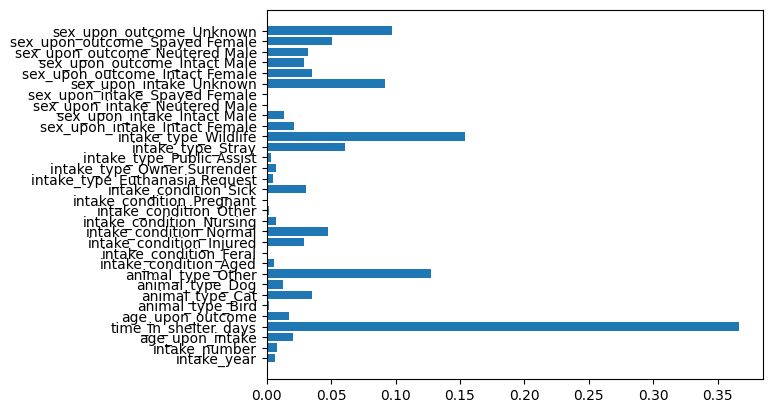

In [14]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

skb = SelectKBest(mutual_info_classif, k=2)
X_new = skb.fit_transform(X,y)
print("Odabrane značajke: ")
print(skb.get_feature_names_out())

dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best").fit(
    X_new, y
)

l = []
for col in X.columns:
    l.append(col)
plt.barh(l, skb.scores_)

Odaberite $K$ najbolje rangiranih značajki te trenirajte klasifikatore na podskupu za treniranje koristeći odabrane značajke. Možete koristiti najbolje klasifikatore iz Zadatka 2. Samostalno odaberite prikladnu vrijednost za $K$. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon odabira značajki.  

In [15]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best").fit(
    X_train, y_train
)
print("Prije FS: ", accuracy_score(y_test, dt.predict(X_test)))

skb = SelectKBest(mutual_info_classif, k=17)

X_new = skb.fit_transform(X_train, y_train)
X_test_new = skb.transform(X_test)

print("Odabrane značajke: ")
print(skb.get_feature_names_out())

dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best").fit(
    X_new, y_train
)
print("Nakon FS: ", accuracy_score(y_test, dt.predict(X_test_new)))

Prije FS:  0.8664374140302613
Odabrane značajke: 
['age_upon_intake' 'time_in_shelter_days' 'age_upon_outcome'
 'animal_type_Cat' 'animal_type_Other' 'intake_condition_Injured'
 'intake_condition_Normal' 'intake_condition_Sick' 'intake_type_Stray'
 'intake_type_Wildlife' 'sex_upon_intake_Intact Female'
 'sex_upon_intake_Unknown' 'sex_upon_outcome_Intact Female'
 'sex_upon_outcome_Intact Male' 'sex_upon_outcome_Neutered Male'
 'sex_upon_outcome_Spayed Female' 'sex_upon_outcome_Unknown']
Nakon FS:  0.859697386519945


## **Zadatak 4: Odabir značajki - omotači**


Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2). Zatim dodatno podijelite podskup za treniranje na podskupove za treniranje i vrednovanje u omjeru 65:35. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.35, random_state=42)

Pomoću omotača SFS provedite odabir značajki za promatrani skup podataka. Isprobajte nekoliko različitih vrijednosti za konačan broj značajki, vodeći se performansama klasifikatora. Možete koristiti najbolji klasifikator iz Zadatka 2 za vrednovanje podskupova značajki. Napomena: klasifikator trenirajte na podskupu za trening, a podskupove značajki koje stvara SFS vrednujte na podskupu za vrednovanje.

In [21]:
from sklearn.feature_selection import SequentialFeatureSelector

dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best").fit(
    X_train, y_train
)
sfs = SequentialFeatureSelector(
    dt,
    n_features_to_select=16,
    direction="forward",
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)
sfs.fit(X_val, y_val)

selected_feature_indices = np.arange(X.shape[1])[sfs.support_]  # indeksi odabranih parametara
feature_names = X.columns # nazivi svih parametara
selected_feature_names = [feature_names[i] for i in selected_feature_indices] # nazivi odabranih parametara
selected_feature_names

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

['age_upon_intake',
 'time_in_shelter_days',
 'age_upon_outcome',
 'animal_type_Bird',
 'animal_type_Other',
 'intake_condition_Aged',
 'intake_condition_Feral',
 'intake_condition_Injured',
 'intake_condition_Nursing',
 'intake_condition_Pregnant',
 'intake_condition_Sick',
 'intake_type_Euthanasia Request',
 'intake_type_Wildlife',
 'sex_upon_intake_Spayed Female',
 'sex_upon_intake_Unknown',
 'sex_upon_outcome_Unknown']

Najbolje klasifikatore iz Zadatka 2 trenirajte na objedinjenom podskupu za treniranje i vrednovanje, koristeći odabrane značajke iz ovog zadatka. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon odabira značajki.

In [18]:
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
dt.fit(X_train_sfs, y_train)
y_pred_sfs = dt.predict(X_test_sfs)
sfs_score = accuracy_score(y_test, y_pred_sfs)

dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)

print("Sa sfs-om", sfs_score)
print("Bez sfs-a", score)

Sa sfs-om 0.8576341127922971
Bez sfs-a 0.8606602475928473


## **Zadatak 5: Preuzorkovanje**

Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2).

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



```
# Ovo je oblikovano kao kôd
```

Pomoću metode nasumičnog preuzorkovanja provedite preuzorkovanje podskupa za treniranje.

In [24]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_new, y_new = oversample.fit_resample(X_train, y_train)

new_df = pd.DataFrame(X_new)
# new_df['label'] = y_new

dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best")
dt.fit(X_train,y_train)
print("CAC prije preuzorkovanja", accuracy_score(y_test, dt.predict(X_test)))

dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best")
dt.fit(X_new,y_new)
print("CAC poslije preuzorkovanja", accuracy_score(y_new, dt.predict(X_new)))

CAC prije preuzorkovanja 0.8658872077028886
CAC poslije preuzorkovanja 0.9247926497183362


Najbolje klasifikatore iz Zadatka 2 trenirajte na preuzorkovanom podskupu za treniranje. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon preuzorkovanja. 